**Group-8**

**Team members**

 * Khirabdhi Acharya

* Brajabijayini Acharya

* Akash Sharma

* Jay Patel

* Sukhjeet Kaur

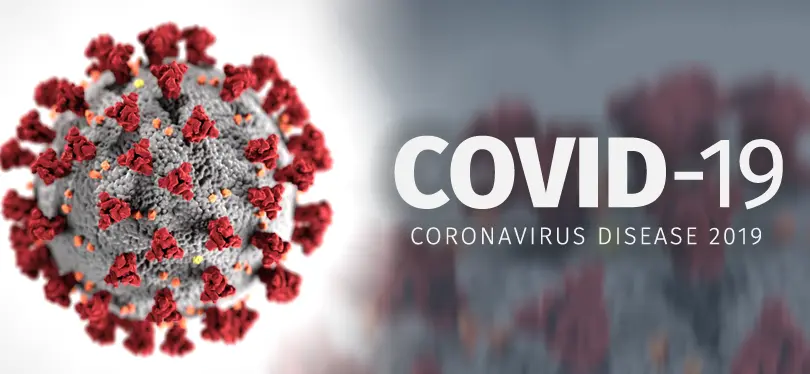

# **`Covid-19 Data Analysis and best forecasting`**

## Team members

Khirabdhi Acharya

Brajabijayini Acharya

Akash Sharma

Jay Patel

Sukhjeet Kaur

Data set: Covid19 dataset

source: Kaggle- https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset

The data set observation is conducted By "Our World in data" with collaboration of The oxford university.

https://ourworldindata.org/covid-vaccinations

The main objective of this project is to develop a deep learning model that takes into account all available data in order to forecast behavior in future days, enabling the possibility of supporting our decisions or next actions in the duty of keeping our community safe. 

# **Install Required Libraries**





In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

#**Import Libraries**

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import plotly.graph_objs as go#visualization
from plotly.offline import iplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

# **Load Data**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/owid-covid-data.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


# **1.Data Wrangling**






**1.1.Data cleaning**

In [ ]:
# Lets check the columns,types of data and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [ ]:
#Lets check what columns we have
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
#renaming columns for better format
data.columns = ['Iso code', 'Continent', 'Location', 'Date', 'Total Cases', 'New Cases',
       'New cases smoothed', 'Total deaths', 'New deaths',
       'new deaths smoothed', 'total cases per million',
       'new cases per million', 'new cases smoothed per million',
       'total deaths per million', 'new deaths per million',
       'new deaths smoothed per million', 'reproduction rate', 'icu patients',
       'icu patients per million', 'hosp patients',
       'hosp patients per million', 'weekly icu admissions',
       'weekly icu admissions per million', 'weekly hosp admissions',
       'weekly hosp admissions per million', 'new tests', 'total tests',
       'total tests per thousand', 'new tests per thousand',
       'new tests smoothed', 'new tests smoothed per thousand',
       'positive rate', 'tests per case', 'tests units', 'total vaccinations',
       'people vaccinated', 'people fully vaccinated', 'total boosters',
       'new vaccinations', 'new vaccinations smoothed',
       'total vaccinations per hundred', 'people vaccinated per hundred',
       'people fully vaccinated per hundred', 'total boosters per hundred',
       'new vaccinations smoothed per million',
       'new people vaccinated smoothed',
       'new people vaccinated smoothed per hundred', 'stringency index',
       'population', 'population density', 'median age', 'aged 65 older',
       'aged 70 older', 'gdp per capita', 'extreme poverty',
       'cardiovasc death rate', 'diabetes prevalence', 'female smokers',
       'male smokers', 'handwashing facilities', 'hospital beds per thousand',
       'life expectancy', 'human development index',
       'excess mortality cumulative absolute', 'excess mortality cumulative',
       'excess mortality', 'excess mortality cumulative per million']

In [ ]:
#Check for data types
data.dtypes

Iso code                                    object
Continent                                   object
Location                                    object
Date                                        object
Total Cases                                float64
                                            ...   
human development index                    float64
excess mortality cumulative absolute       float64
excess mortality cumulative                float64
excess mortality                           float64
excess mortality cumulative per million    float64
Length: 67, dtype: object

In [ ]:
#checking the shape of data shape
data.shape

(166326, 67)

In [ ]:
# Lets check statistical summary
data.describe()

,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,new cases smoothed per million,total deaths per million,...,female smokers,male smokers,handwashing facilities,hospital beds per thousand,life expectancy,human development index,excess mortality cumulative absolute,excess mortality cumulative,excess mortality,excess mortality cumulative per million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


In [ ]:
#check for all the types including object
data.describe(include="all")

,Iso code,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,...,female smokers,male smokers,handwashing facilities,hospital beds per thousand,life expectancy,human development index,excess mortality cumulative absolute,excess mortality cumulative,excess mortality,excess mortality cumulative per million
count,166326,156370,166326,166326,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
unique,238,6,238,795,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,795,39417,795,238,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,NaN,NaN,NaN,NaN,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,NaN,NaN,NaN,NaN,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,NaN,NaN,NaN,NaN,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,NaN,NaN,NaN,NaN,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067


In [ ]:
# Checkong for missing values
missing_data = data.isnull()
missing_data

,Iso code,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,...,female smokers,male smokers,handwashing facilities,hospital beds per thousand,life expectancy,human development index,excess mortality cumulative absolute,excess mortality cumulative,excess mortality,excess mortality cumulative per million
0,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
166322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
166323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
166324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [ ]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Iso code
False    166326
Name: Iso code, dtype: int64

Continent
False    156370
True       9956
Name: Continent, dtype: int64

Location
False    166326
Name: Location, dtype: int64

Date
False    166326
Name: Date, dtype: int64

Total Cases
False    163293
True       3033
Name: Total Cases, dtype: int64

New Cases
False    163133
True       3193
Name: New Cases, dtype: int64

New cases smoothed
False    161150
True       5176
Name: New cases smoothed, dtype: int64

Total deaths
False    145451
True      20875
Name: Total deaths, dtype: int64

New deaths
False    145487
True      20839
Name: New deaths, dtype: int64

new deaths smoothed
False    143390
True      22936
Name: new deaths smoothed, dtype: int64

total cases per million
False    162535
True       3791
Name: total cases per million, dtype: int64

new cases per million
False    162375
True       3951
Name: new cases per million, dtype: int64

new cases smoothed per million
False    160398
True       5928
Name: new cases smoot

In [ ]:
#filling missing values with most occured values with value_count function for categorical values in data set
data= data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data


,Iso code,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,...,female smokers,male smokers,handwashing facilities,hospital beds per thousand,life expectancy,human development index,excess mortality cumulative absolute,excess mortality cumulative,excess mortality,excess mortality cumulative per million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785


In [ ]:
#filling missing values by taking median for nemerical values
data=data.fillna(data.median())
data

,Iso code,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,...,female smokers,male smokers,handwashing facilities,hospital beds per thousand,life expectancy,human development index,excess mortality cumulative absolute,excess mortality cumulative,excess mortality,excess mortality cumulative per million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,1.0,0.0,0.000,...,1.9,24.7,37.746,0.5,64.83,0.511,-41.2,0.5,-0.25,-230.933785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,0.5,-0.25,-230.933785


In [ ]:
#rechecking missing values after handling
data.isnull().sum()

Iso code                                   0
Continent                                  0
Location                                   0
Date                                       0
Total Cases                                0
                                          ..
human development index                    0
excess mortality cumulative absolute       0
excess mortality cumulative                0
excess mortality                           0
excess mortality cumulative per million    0
Length: 67, dtype: int64

In [ ]:
# Checking for Duplicates present in data
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_data.shape)


number of duplicate rows: (0, 67)


In [ ]:
#Dropping few columns as the data set has many coulmns which we will not need for our analysis!
data = data.drop(['Iso code','new cases smoothed per million','new deaths smoothed per million',
'icu patients per million','weekly icu admissions per million','weekly hosp admissions per million','total tests per thousand',
'gdp per capita',
'handwashing facilities',
'human development index','excess mortality cumulative absolute',
 'excess mortality cumulative','excess mortality','excess mortality cumulative per million','new deaths per million'],axis=1)

In [ ]:
data.columns

Index(['Continent', 'Location', 'Date', 'Total Cases', 'New Cases',
       'New cases smoothed', 'Total deaths', 'New deaths',
       'new deaths smoothed', 'total cases per million',
       'new cases per million', 'total deaths per million',
       'reproduction rate', 'icu patients', 'hosp patients',
       'hosp patients per million', 'weekly icu admissions',
       'weekly hosp admissions', 'new tests', 'total tests',
       'new tests per thousand', 'new tests smoothed',
       'new tests smoothed per thousand', 'positive rate', 'tests per case',
       'tests units', 'total vaccinations', 'people vaccinated',
       'people fully vaccinated', 'total boosters', 'new vaccinations',
       'new vaccinations smoothed', 'total vaccinations per hundred',
       'people vaccinated per hundred', 'people fully vaccinated per hundred',
       'total boosters per hundred', 'new vaccinations smoothed per million',
       'new people vaccinated smoothed',
       'new people vaccinated smooth

In [ ]:
#reset index 
data.reset_index(drop=True, inplace=True)

In [ ]:
data.tail()

,Continent,Location,Date,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
166321,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,15694.959,...,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7,1.7,61.49
166322,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,15736.835,...,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7,1.7,61.49
166323,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,15736.835,...,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7,1.7,61.49
166324,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,15818.731,...,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7,1.7,61.49
166325,Africa,Zimbabwe,2022-03-05,239019.0,280.0,459.429,5397.0,0.0,0.571,15837.284,...,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7,1.7,61.49


In [ ]:
data.dtypes

Continent                                      object
Location                                       object
Date                                           object
Total Cases                                   float64
New Cases                                     float64
New cases smoothed                            float64
Total deaths                                  float64
New deaths                                    float64
new deaths smoothed                           float64
total cases per million                       float64
new cases per million                         float64
total deaths per million                      float64
reproduction rate                             float64
icu patients                                  float64
hosp patients                                 float64
hosp patients per million                     float64
weekly icu admissions                         float64
weekly hosp admissions                        float64
new tests                   

In [ ]:
#converting float to Integer
data[["Total Cases", "New Cases", "Total deaths", "New deaths","hosp patients",
"weekly hosp admissions","new tests","total tests",
"tests per case","total vaccinations","people vaccinated","people fully vaccinated",
"total boosters","new vaccinations","population","hospital beds per thousand"]] = data[["Total Cases", 
"New Cases", "Total deaths", "New deaths","hosp patients","weekly hosp admissions","new tests","total tests",
"tests per case","total vaccinations","people vaccinated","people fully vaccinated",
"total boosters","new vaccinations","population","hospital beds per thousand"]].astype("int")

In [ ]:
data.dtypes

Continent                                      object
Location                                       object
Date                                           object
Total Cases                                     int64
New Cases                                       int64
New cases smoothed                            float64
Total deaths                                    int64
New deaths                                      int64
new deaths smoothed                           float64
total cases per million                       float64
new cases per million                         float64
total deaths per million                      float64
reproduction rate                             float64
icu patients                                  float64
hosp patients                                   int64
hosp patients per million                     float64
weekly icu admissions                         float64
weekly hosp admissions                          int64
new tests                   

In [ ]:
data.shape

(166326, 52)

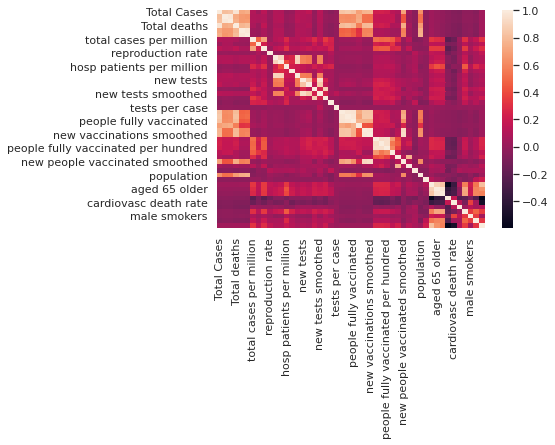

In [ ]:
sns.heatmap(data.corr());

Checking for Outliers in data set

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Total Cases                                   2.828540e+05
New Cases                                     1.013000e+03
New cases smoothed                            1.051857e+03
Total deaths                                  5.247000e+03
New deaths                                    1.400000e+01
new deaths smoothed                           1.457100e+01
total cases per million                       3.535072e+04
new cases per million                         9.651350e+01
total deaths per million                      5.508660e+02
reproduction rate                             2.300000e-01
icu patients                                  0.000000e+00
hosp patients                                 0.000000e+00
hosp patients per million                     0.000000e+00
weekly icu admissions                         0.000000e+00
weekly hosp admissions                        0.000000e+00
new tests                                     5.084000e+03
total tests                                   1.092750e+

In [ ]:
#saving data set into another csv after cleaning
data.to_csv('clean_data.csv',index=False)

In [ ]:
data2=pd.read_csv("clean_data.csv")

In [ ]:
data2.isnull().sum()

Continent                                     0
Location                                      0
Date                                          0
Total Cases                                   0
New Cases                                     0
New cases smoothed                            0
Total deaths                                  0
New deaths                                    0
new deaths smoothed                           0
total cases per million                       0
new cases per million                         0
total deaths per million                      0
reproduction rate                             0
icu patients                                  0
hosp patients                                 0
hosp patients per million                     0
weekly icu admissions                         0
weekly hosp admissions                        0
new tests                                     0
total tests                                   0
new tests per thousand                  

In [ ]:
#correlation matrix to show relation between each variables present in the data set
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [ ]:
correlation

,Total Cases,New Cases,New cases smoothed,Total deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,total deaths per million,reproduction rate,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
Total Cases,1.000000,0.808623,0.829204,0.967943,0.724240,0.744665,0.102581,0.032796,0.134109,0.006743,...,0.037681,0.005377,-0.014786,-0.039539,-0.062686,-0.074099,-0.027439,-0.023873,-0.053705,0.044391
New Cases,0.808623,1.000000,0.976968,0.737347,0.668445,0.654637,0.095213,0.089020,0.099920,0.018663,...,0.036032,0.010144,-0.006586,-0.035285,-0.055105,-0.065456,-0.019106,-0.017091,-0.039697,0.041084
New cases smoothed,0.829204,0.976968,1.000000,0.751687,0.664390,0.674582,0.098946,0.078566,0.102363,0.014035,...,0.036274,0.009913,-0.007137,-0.035736,-0.055763,-0.066447,-0.019710,-0.017532,-0.040877,0.041466
Total deaths,0.967943,0.737347,0.751687,1.000000,0.780834,0.802760,0.082346,0.017300,0.152643,0.009690,...,0.039188,0.002840,-0.018714,-0.044525,-0.069639,-0.082339,-0.032632,-0.026706,-0.059153,0.047547
New deaths,0.724240,0.668445,0.664390,0.780834,1.000000,0.975597,0.028016,0.016160,0.079540,0.008492,...,0.042424,0.002849,-0.020482,-0.047891,-0.069511,-0.088373,-0.034843,-0.022663,-0.059971,0.049348
new deaths smoothed,0.744665,0.654637,0.674582,0.802760,0.975597,1.000000,0.029546,0.011969,0.082781,0.006053,...,0.043179,0.002697,-0.021159,-0.048958,-0.070870,-0.090339,-0.035804,-0.023123,-0.061365,0.050321
total cases per million,0.102581,0.095213,0.098946,0.082346,0.028016,0.029546,1.000000,0.478085,0.711053,0.021926,...,0.327876,0.289671,0.266130,-0.216935,-0.156599,0.036912,0.303493,0.086662,0.167353,0.317570
new cases per million,0.032796,0.089020,0.078566,0.017300,0.016160,0.011969,0.478085,1.000000,0.230796,0.082995,...,0.153328,0.142961,0.132054,-0.095251,-0.083272,0.009025,0.128799,0.027802,0.074438,0.152382
total deaths per million,0.134109,0.099920,0.102363,0.152643,0.079540,0.082781,0.711053,0.230796,1.000000,0.025563,...,0.340708,0.341754,0.328678,-0.212101,-0.129367,0.001198,0.336476,0.072715,0.199833,0.289237
reproduction rate,0.006743,0.018663,0.014035,0.009690,0.008492,0.006053,0.021926,0.082995,0.025563,1.000000,...,0.159317,0.145078,0.137689,-0.125846,-0.061004,0.000488,0.113044,0.033153,0.075985,0.162622


In [ ]:
#convert to array
corr_array  = np.array(correlation)

In [ ]:
#plotting correlation matrix
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

#**2.Exploratory Data Analysis (EDA)**

Text(0.5, 1.0, 'Scatter PLot of Total cases Vs Total tests')

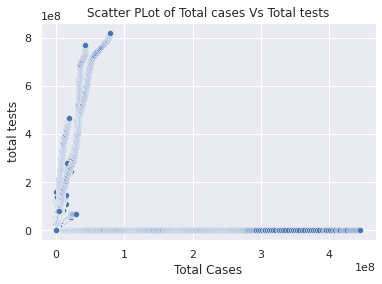

In [ ]:
sns.scatterplot(x='Total Cases',y='total tests',data=data2)
plt.title("Scatter PLot of Total cases Vs Total tests")

Text(0.5, 1.0, 'Total cases Continent wise')

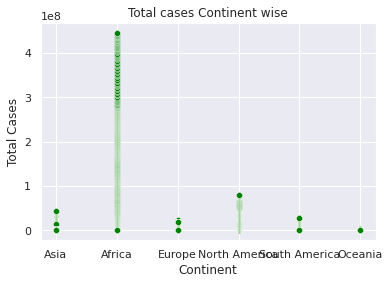

In [ ]:
sns.scatterplot(x='Continent',y='Total Cases',data=data2,color=['green'])
plt.title("Total cases Continent wise")

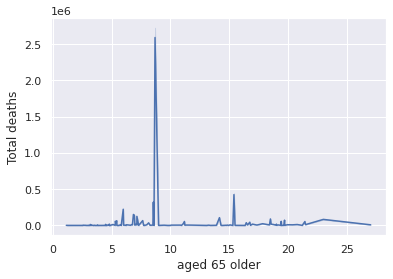

In [ ]:
sns.lineplot(x='aged 65 older',y='Total deaths',data=data2)

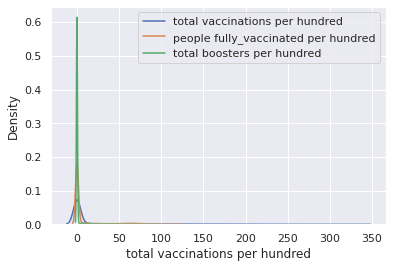

In [ ]:
sns.kdeplot(data2['total vaccinations per hundred'], label='total vaccinations per hundred' )
sns.kdeplot(data2['people fully vaccinated per hundred'], label='people fully_vaccinated per hundred' )
sns.kdeplot(data2['total boosters per hundred'], label='total boosters per hundred' )

plt.legend()


[None]

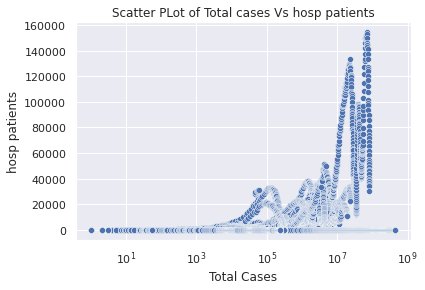

In [ ]:
#Relationship between continuous numerical variables Plot a scatter plot

splot=sns.scatterplot( data = data2, x = 'Total Cases', y='hosp patients')
plt.title("Scatter PLot of Total cases Vs hosp patients")
splot.set(xscale="log")


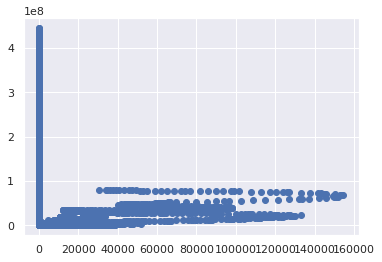

In [ ]:
y=data2['Total Cases']
x=data2['hosp patients']
plt.scatter(x,y)

Text(0, 0.5, 'New cases')

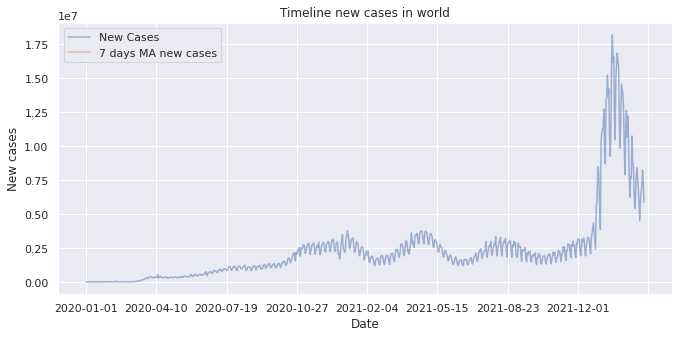

In [ ]:
data3=data2.copy()
data3= data2.copy()
data3.date = pd.to_datetime(data2['Date'])
data3 = data3.groupby('Date').sum()
data3['7 days MA new cases'] = 0
data3['7 days MA new cases'] = data2['New Cases'].rolling(7).mean() 
data3['7 days MA new deaths'] = 0
data3['7 days MA new deaths'] = data2['New deaths'].rolling(7).mean()

data3[['New Cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

Text(0.5, 1.0, 'Timeline new cases in world')

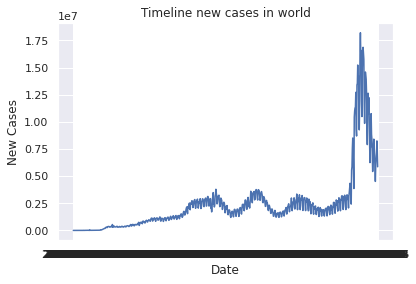

In [ ]:
data2.date = pd.to_datetime(data2['Date'])
data2 = data2.groupby('Date').sum()
sns.lineplot(x = 'Date', y = 'New Cases',data = data2)
plt.title('Timeline new cases in world')